In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\Alex\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# поиск выбросов в столбце
## ящик с усами - boxplot

In [2]:
df = pd.read_csv('Diamond Price Prediction.csv')
df.head(10)

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


<AxesSubplot:xlabel='Carat(Weight of Daimond)'>

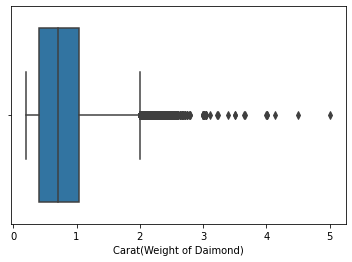

In [3]:
sns.boxplot(x=df['Carat(Weight of Daimond)'])

# точечная диаграмма - sketter plot

In [5]:
import matplotlib.pyplot as plt

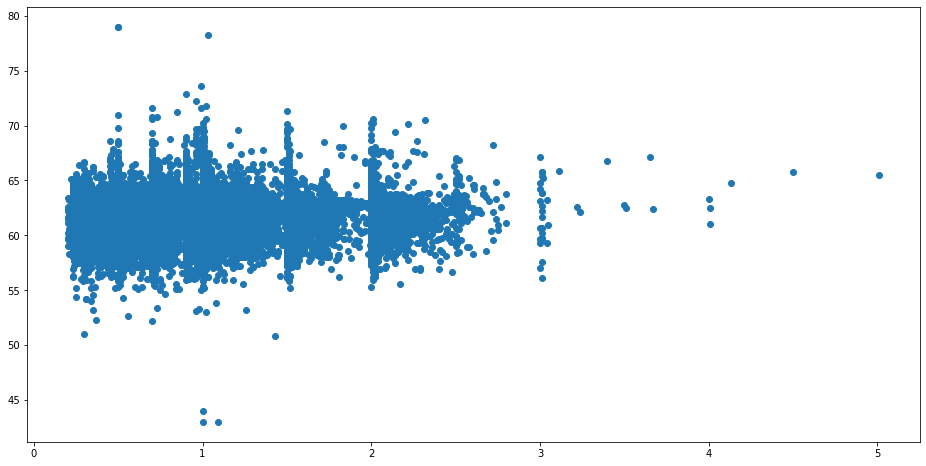

In [8]:
fig, ax = plt.subplots(figsize =(16,8))
ax.scatter(df['Carat(Weight of Daimond)'], df['Depth'])
plt.show()

# z-оценка (для отброса выбросов)

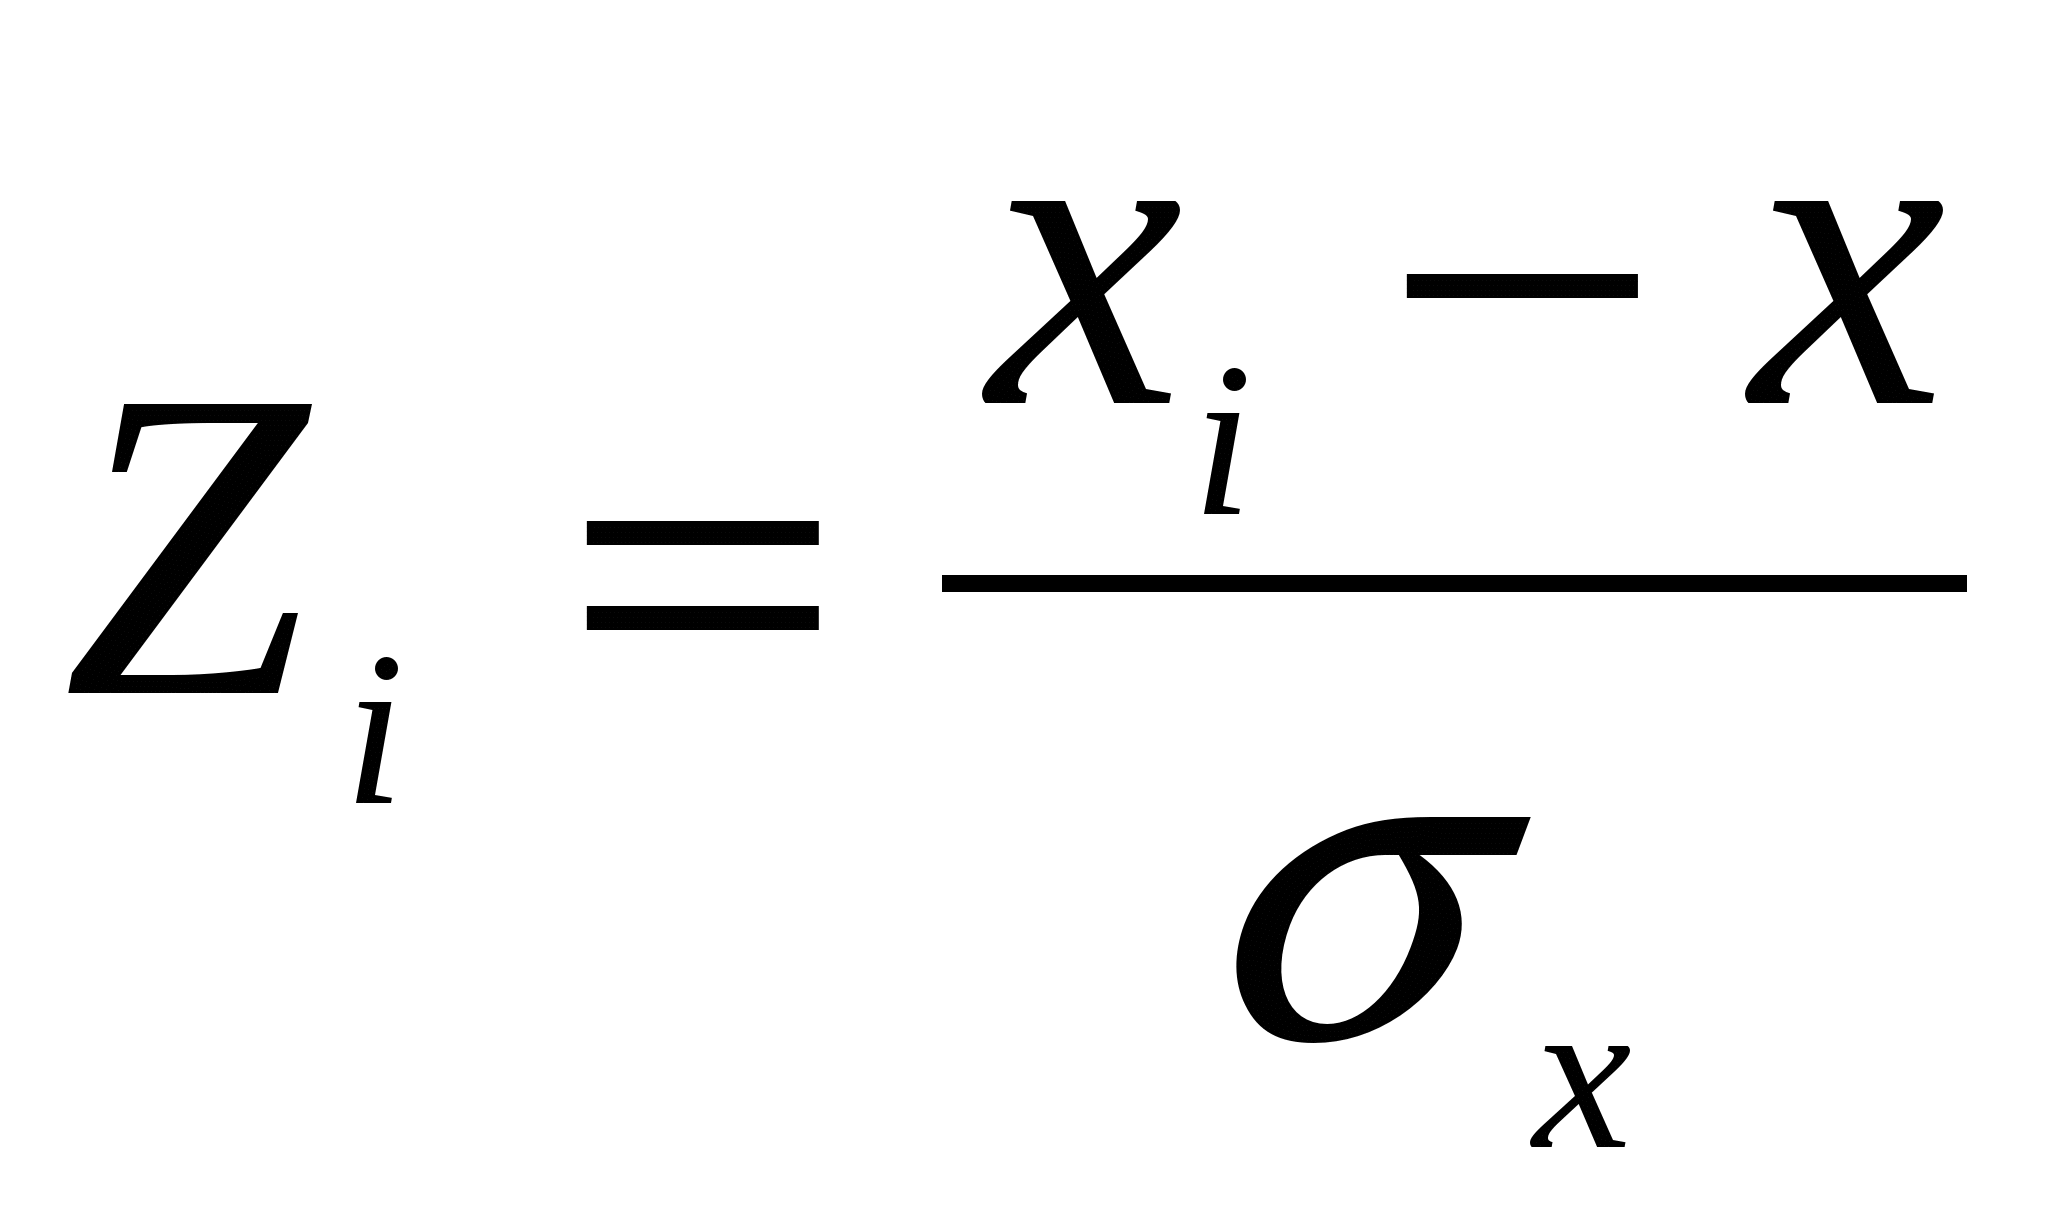

In [9]:
from IPython.display import Image
Image(filename='20236_html_65f6f13b.gif', width=400, height=400)

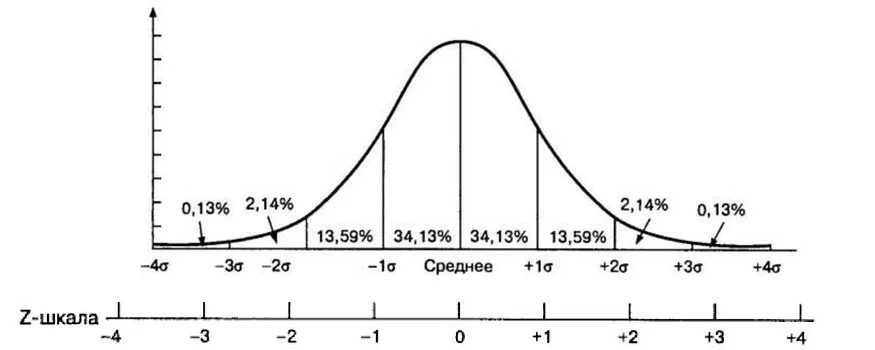

In [11]:
Image(filename='scale_1200.png', width=1000, height=1000)

# переведем наши двнные в числа

In [14]:
from sklearn import preprocessing

In [15]:
cat_columns = [cname for cname in df.columns if df[cname].dtype == 'object']
encoder = preprocessing.LabelEncoder()
for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])

# z - оценка для наших данных

In [16]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[1.19816781 0.53809897 0.93716275 ... 1.58783745 1.53619556 1.57112919]
 [1.24036129 0.43494935 0.93716275 ... 1.64132529 1.65877419 1.74117497]
 [1.19816781 1.51114729 0.93716275 ... 1.49869105 1.45739502 1.74117497]
 ...
 [0.20662095 1.40799767 1.52502147 ... 0.06343409 0.04774083 0.03013526]
 [0.13092691 0.43494935 0.8264134  ... 0.37338325 0.33750627 0.28520393]
 [0.10113725 0.53809897 1.52502147 ... 0.08811478 0.11861587 0.14349912]]


In [29]:
threshold = 9
print(np.where(z>9))

(array([ 4518,  6341, 10377, 24067, 24932, 41918, 48410, 49189, 50773,
       52860, 52861], dtype=int64), array([4, 4, 4, 8, 5, 4, 9, 8, 5, 4, 4], dtype=int64))


In [32]:
print(z[4518][4])

13.087602738397587


In [33]:
np.array(df)[4518][4]

43.0

## удаление выбросов

In [ ]:
new_df = df 